In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def LIFmodel(amp):
    C = 0.200
    R = 100
    tau = R * C
    V_rest = -75
    V_reset = -70
    V_th = -50
    dt = 0.1
    time_total = 1000
    k = math.ceil(time_total / dt)
    V = np.zeros(k)
    I = np.zeros(k)
    V[0] = V_rest
    t = np.arange(0, time_total, dt)
    t_start = 200
    t_stop = 700
    Iamplitude = amp
    I[t_start * 10 - 1: t_stop * 10 - 1] = Iamplitude
    
    spiketime = []
    for i in range(k - 1):
        Vinf = V_rest + R * I[i]
        V[i + 1] = Vinf + (V[i] - Vinf) * math.exp((t[i] - t[i + 1]) / tau)
        if V[i + 1] > V_th:
            V[i + 1] = V_reset
            spiketime.append((i + 1)* 0.1)

    return V, I, t, spiketime

<Figure size 432x288 with 0 Axes>

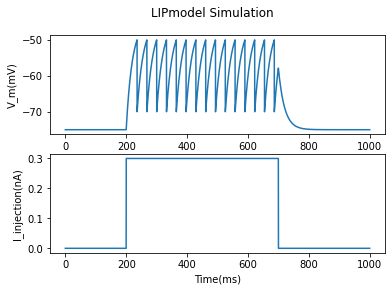

In [11]:
amp = 0.3
V, I, t, spiketime = LIFmodel(amp)
plt.figure(1)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('LIPmodel Simulation')

ax1.plot(t, V)
ax1.set_xlabel("Time(ms)")
ax1.set_ylabel("V_m(mV)")

ax2.plot(t, I)
ax2.set_xlabel("Time(ms)")
ax2.set_ylabel("I_injection(nA)")

plt.show()

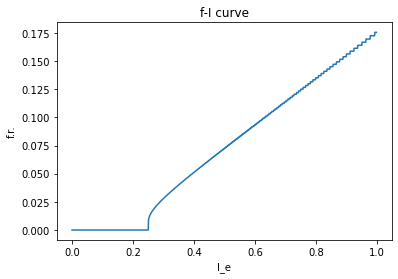

In [14]:
##### f-l-curve
def plot_f_I_curve(timestep = 0.0001):
    dt = timestep
    k2 = math.ceil(1 / dt);
    Ie = np.arange(0, 1, step = dt)
    firerate = np.zeros(k2)
    for i in range(k2):
        V, I,t,spikeTimes = LIFmodel(Ie[i])
        if len(spikeTimes) == 0:
            firerate[i] = 0
        else:
            time = spikeTimes[0]
            firerate[i] = 1 / (time - 200)
    return Ie, firerate

timestep = 0.001
Ie, firerate = plot_f_I_curve(timestep)
plt.figure(2)
plt.plot(Ie, firerate)
plt.title("f-I curve")
plt.xlabel("I_e")
plt.ylabel("f.r.")
plt.show()